Item to item based recommendation system based on product description

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [28]:
df = pd.read_csv('home_depot_data.csv')

# List of columns to keep, I will be working with only description of products
columns_to_keep = ['product_id', 'description']

# Drop columns that are not in columns_to_keep
df = df.loc[:, columns_to_keep]
df = df.dropna()
df = df.drop(df.columns.difference(columns_to_keep), axis=1)

df.head()

,product_id,description
0,310090686,"This heavyweight, water-repellent hooded sweat..."
1,206724580,If you need more length between your existing ...
2,310347105,Polyester cover resembling rich Italian tapest...
3,312338711,It features a rectangle shape. This vessel set...
4,308561619,This 9 in. black full grain leather logger boo...


In [29]:
prod_descriptions1 = df.head(500)
prod_descriptions1["description"].head(15)

0     This heavyweight, water-repellent hooded sweat...
1     If you need more length between your existing ...
2     Polyester cover resembling rich Italian tapest...
3     It features a rectangle shape. This vessel set...
4     This 9 in. black full grain leather logger boo...
5     With robust structure and sophisticated canvas...
6     BEHR PRO i300 Semi-Gloss Interior Paint has a ...
7     DEWALT High Performance 0.045 in. Metal Cuttin...
8     This Ring Bar Cart is sure to make a statement...
9     This transitional vanity table proudly display...
10    Its easy to add a decorative touch to your hom...
11    BEHR PREMIUM PLUS Interior Paint & Primer offe...
12    BlindsAvenue light filtering cellular shades w...
13    Luverne SlimGrip truck running boards combine ...
14    Our Rustic Collection is an instant classic. R...
Name: description, dtype: object

Feature extraction from product descriptions

In [30]:
#TF-IDF Term Frequency-Inverse Document Frequency
#stop-words are common english
vectorizer = TfidfVectorizer(stop_words='english')
#fits the vectorizer to your data & transforms the text data into a TF-IDF matrix 
X1 = vectorizer.fit_transform(prod_descriptions1["description"])
X1

<500x4472 sparse matrix of type '<class 'numpy.float64'>'
	with 20425 stored elements in Compressed Sparse Row format>

Clustering product description

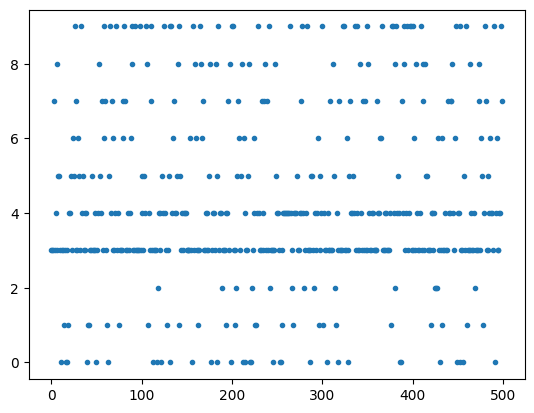

In [31]:
#Fitting K-Means to the dataset
X=X1
#k-means++ initialization method, which aims to select centroids that are distant from each other
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [36]:
#Optimal clusters is 
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)



Top terms per cluster:
Cluster 0:
 exterior
 paint
 behr
 sheen
 ultra
 masonry
 excellent
 doors
 home
 trim
Cluster 1:
 sample
 cord
 light
 power
 ft
 cable
 lights
 metal
 led
 16
Cluster 2:
 door
 glass
 shower
 easy
 wall
 doors
 bathroom
 designed
 durable
 rod
Cluster 3:
 design
 style
 room
 home
 space
 add
 piece
 ceiling
 modern
 light
Cluster 4:
 rug
 collection
 rugs
 rustic
 area
 natural
 safavieh
 home
 soft
 colors
Cluster 5:
 wood
 beams
 real
 shutters
 home
 authentic
 shades
 faux
 light
 offer
Cluster 6:
 coat
 scuff
 stain
 paint
 primer
 label
 details
 behr
 colors
 hide
Cluster 7:
 glidden
 paint
 exterior
 diamond
 latex
 results
 delivers
 tinted
 application
 essentials
Cluster 8:
 plus
 premium
 stains
 paint
 finish
 resists
 mildew
 hide
 low
 exceptional
Cluster 9:
 stair
 brake
 steel
 treads
 stainless
 size
 complete
 rail
 design
 nosing


Predicting clusters based on key search words

In [43]:
def show_recommendations(product):
    #print("Cluster ID:")
    #Transform the input product description into TF-IDF format
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [44]:
show_recommendations("room decor")

Cluster 3:
 design
 style
 room
 home
 space
 add
 piece
 ceiling
 modern
 light


In [48]:
show_recommendations("cutting tool")

Cluster 2:
 door
 glass
 shower
 easy
 wall
 doors
 bathroom
 designed
 durable
 rod
